In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from numpy.random import RandomState
import scipy
from sklearn.cluster import KMeans

rs = RandomState(12345)

# import data
# make predicitions on this data set
predict_df = pd.read_csv('./synthetic_dataset_evaluation.csv')
predict_df.head()

,entry_id,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Feature_F,Feature_G,Feature_H,Feature_I,Feature_J,Feature_K,Feature_L,Feature_M,Feature_N
0,entry_0,2.1,B_1,16670.4,D_6,1.0,F_1,G_5,H_4,I_1,J_2,0.0,0.0,1.4,N_1
1,entry_1,6.3,B_3,18791.9,D_3,0.7,F_2,G_5,H_2,I_1,J_1,0.0,0.0,3.0,N_1
2,entry_2,3.0,B_3,35688.2,D_10,1.6,F_1,G_4,H_4,I_1,J_1,0.0,0.0,2.0,N_1
3,entry_3,2.0,B_3,15477.9,D_6,1.0,F_1,G_6,H_6,I_5,J_2,0.0,0.0,4.0,N_1
4,entry_4,4.3,B_3,18880.8,D_4,1.4,F_2,G_2,H_2,I_1,J_1,0.0,0.0,4.5,N_1


## Exploratory Data Analysis

In [337]:
eval_df = pd.read_csv('./synthetic_dataset.csv')
print(eval_df.shape)
eval_df.dtypes

(4500, 15)


Feature_A    float64
Feature_B     object
Feature_C    float64
Feature_D     object
Feature_E    float64
Feature_F     object
Feature_G     object
Feature_H     object
Feature_I     object
Feature_J     object
Feature_K    float64
Feature_L    float64
Feature_M    float64
Feature_N     object
Label         object
dtype: object

In [338]:
eval_df.head()

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Feature_F,Feature_G,Feature_H,Feature_I,Feature_J,Feature_K,Feature_L,Feature_M,Feature_N,Label
0,4.7,B_3,11475.4,D_2,0.9,F_2,G_1,H_2,I_1,J_1,0.0,0.0,4.0,N_1,Yes
1,4.2,B_3,16300.3,D_1,1.3,F_4,G_11,H_4,I_3,J_2,0.0,0.0,4.0,N_1,Yes
2,6.2,B_3,13631.4,D_6,1.0,F_2,G_1,H_3,I_1,J_2,0.0,0.0,4.0,N_1,Yes
3,1.8,B_3,7405.4,D_3,0.7,F_1,G_6,H_4,I_5,J_2,0.0,0.0,2.0,NaN,Yes
4,4.9,B_2,26356.8,D_1,1.3,F_2,G_2,H_2,I_1,J_1,0.0,0.0,6.0,N_1,No


### Missing Entries

In [339]:
eval_df.isna().sum()[eval_df.isna().sum()>0]

Feature_B    257
Feature_G    257
Feature_N     80
dtype: int64

In [340]:
df_f = eval_df.dropna()
df_f.isna().sum()
lost = eval_df.shape[0]-df_f.shape[0]
perc = lost/(len(eval_df))*100
f_perc = "{:.2f}".format(perc)
print('Deleted rows:',lost,"(",f_perc,'% of the dataset)')

Deleted rows: 332 ( 7.38 % of the dataset)


### Continuous Variables Analysis

In [341]:
df_cont = df_f[['Feature_A','Feature_C', 'Feature_K', 'Feature_L', 'Feature_M']]
df_cont.describe()

,Feature_A,Feature_C,Feature_K,Feature_L,Feature_M
count,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000
mean,3.850816,18924.849280,106.563820,9.724256,4.110365
std,1.304252,10710.932177,758.182711,42.100601,1.196950
min,1.700000,1921.400000,0.000000,0.000000,0.100000
25%,2.800000,11541.375000,0.000000,0.000000,4.000000
50%,3.700000,17699.500000,0.000000,0.000000,4.000000
75%,4.700000,24025.975000,0.000000,0.000000,4.500000
max,9.000000,122658.300000,9999.900000,377.000000,9.900000


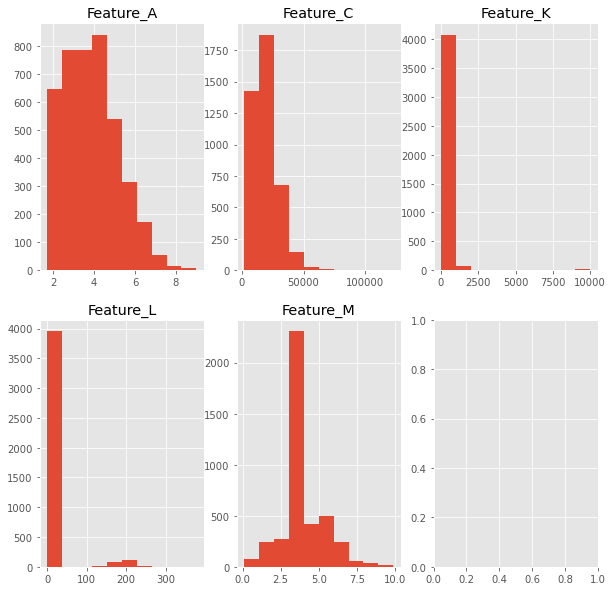

In [342]:
fig, axs = plt.subplots(2,3)
#fig.suptitle('A tale of 2 subplots')

axs[0,0].hist(df_cont.Feature_A)
axs[0,0].set_title('Feature_A')
axs[0,1].hist(df_cont.Feature_C)
axs[0,1].set_title('Feature_C')
axs[0,2].hist(df_cont.Feature_K)
axs[0,2].set_title('Feature_K')
axs[1,0].hist(df_cont.Feature_L)
axs[1,0].set_title('Feature_L')
axs[1,1].hist(df_cont.Feature_M)
axs[1,1].set_title('Feature_M')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()


In [343]:
df_f

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Feature_F,Feature_G,Feature_H,Feature_I,Feature_J,Feature_K,Feature_L,Feature_M,Feature_N,Label
0,4.7,B_3,11475.4,D_2,0.9,F_2,G_1,H_2,I_1,J_1,0.0,0.0,4.0,N_1,Yes
1,4.2,B_3,16300.3,D_1,1.3,F_4,G_11,H_4,I_3,J_2,0.0,0.0,4.0,N_1,Yes
2,6.2,B_3,13631.4,D_6,1.0,F_2,G_1,H_3,I_1,J_2,0.0,0.0,4.0,N_1,Yes
4,4.9,B_2,26356.8,D_1,1.3,F_2,G_2,H_2,I_1,J_1,0.0,0.0,6.0,N_1,No
5,7.3,B_3,2967.5,D_2,0.9,F_7,G_5,H_6,I_1,J_2,0.0,0.0,1.2,N_1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,5.7,B_6,10133.8,D_1,1.3,F_2,G_2,H_2,I_1,J_1,0.0,0.0,2.0,N_1,Yes
4496,4.0,B_3,28036.2,D_2,0.9,F_2,G_8,H_2,I_1,J_1,0.0,0.0,3.5,N_1,Yes
4497,4.1,B_3,44538.2,D_4,1.4,F_2,G_2,H_2,I_1,J_1,0.0,197.7,6.5,N_1,No
4498,3.1,B_3,38236.8,D_3,0.7,F_2,G_7,H_2,I_1,J_1,0.0,0.0,4.0,N_1,Yes


### Categorical Variables Analysis

In [344]:
df_cat = df_f[['Feature_B','Feature_D', 'Feature_E', 'Feature_F', 'Feature_G', 'Feature_H', 'Feature_I', 'Feature_J', 'Feature_N']]

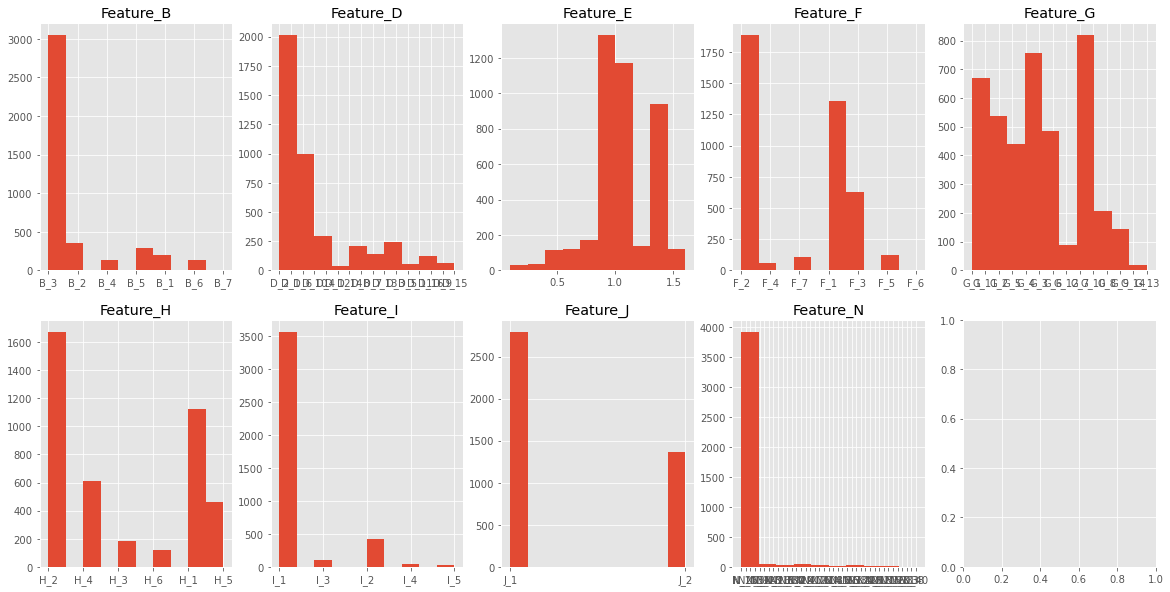

In [345]:
fig, axs = plt.subplots(2,5)
#fig.suptitle('A tale of 2 subplots')

axs[0,0].hist(df_cat.Feature_B)
axs[0,0].set_title('Feature_B')
axs[0,1].hist(df_cat.Feature_D)
axs[0,1].set_title('Feature_D')
axs[0,2].hist(df_cat.Feature_E)
axs[0,2].set_title('Feature_E')
axs[0,3].hist(df_cat.Feature_F)
axs[0,3].set_title('Feature_F')
axs[0,4].hist(df_cat.Feature_G)
axs[0,4].set_title('Feature_G')

axs[1,0].hist(df_cat.Feature_H)
axs[1,0].set_title('Feature_H')
axs[1,1].hist(df_cat.Feature_I)
axs[1,1].set_title('Feature_I')
axs[1,2].hist(df_cat.Feature_J)
axs[1,2].set_title('Feature_J')
axs[1,3].hist(df_cat.Feature_N)
axs[1,3].set_title('Feature_N')

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

### Principal Component Analysis

### Setting Up for Prediction

In [346]:
X = df_f.loc[:, df_f.columns !='Label']
Y = df_f.Label
X = pd.get_dummies(X)

### Decision Trees

In [347]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
scores = cross_val_score(clf, X, Y, cv=10, scoring="roc_auc")
scores

array([0.864526  , 0.85310123, 0.88414446, 0.85674974, 0.84793561,
       0.82575571, 0.8596246 , 0.81893586, 0.865489  , 0.8585409 ])

In [348]:
model = clf.fit(X,Y)

In [352]:
X_test = eval_df.loc[:, eval_df.columns !='Label']
X_test = pd.get_dummies(X_test)
Y_test = eval_df.Label
Y_pred = clf.predict(X_test)
Y_test = Y_test.map({'Yes':1, 'No':0}).sort_values()
Y_pred = pd.Series(Y_pred).map({'Yes':1, 'No':0}).sort_values()

In [353]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=2)
#metrics.auc(fpr, tpr)

roc_auc_score(Y_test, Y_pred)

0.8677150786308974